In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the csv file
df = pd.read_csv("DataCleaning/Data/wdbcDataComplete.csv")
df.head()

,ID number,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave Points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave Points worst,Symmetry worst,Fractal Dimension worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [3]:
df.columns

Index(['ID number', 'Diagnosis', 'Radius mean', 'Texture mean',
       'Perimeter mean', 'Area mean', 'Smoothness mean', 'Compactness mean',
       'Concavity mean', 'Concave Points mean', 'Symmetry mean',
       'Fractal Dimension mean', 'Radius SE', 'Texture SE', 'Perimeter SE',
       'Area SE', 'Smoothness SE', 'Compactness SE', 'Concavity SE',
       'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE',
       'Radius worst', 'Texture worst', 'Perimeter worst', 'Area worst',
       'Smoothness worst', 'Compactness worst', 'Concavity worst',
       'Concave Points worst', 'Symmetry worst', 'Fractal Dimension worst'],
      dtype='object')

In [4]:
# Prepare target data
target = df["Diagnosis"]
target_names = ["malignant", "benigh"]
target = target.map({'M': 1, 'B': 0})
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [5]:
# Prepare feature data
data = df.drop("Diagnosis", axis=1)
feature_names = data.columns
data.head()

,ID number,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave Points mean,Symmetry mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave Points worst,Symmetry worst,Fractal Dimension worst
0,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [6]:
# Use train_test_split to create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [7]:
# StandardScaler, we use it when we don't know everything about the data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
# y_train = y_scaler.transform(y_train)
# y_test = y_scaler.transform(y_test)

# Support Vector Machine

In [9]:
# Import Support vector machine linear classifier
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
# Model Accuracy
print("Test Acc: %.3f" % model.score(X_test, y_test))

Test Acc: 0.965


In [11]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                           target_names=target_names))

             precision    recall  f1-score   support

  malignant       0.96      0.99      0.97        87
     benigh       0.98      0.93      0.95        55

avg / total       0.97      0.96      0.96       142



# Logistic Regression

In [12]:
# Create a Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
# Fit the model to the training set
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
# Calculate the scores for the training and test sets
print(f"Training Score: {classifier.score(X_train, y_train)}")
print(f"Test Score: {classifier.score(X_test, y_test)}")

Training Score: 0.9929577464788732
Test Score: 0.9647887323943662


In [15]:
predictions = classifier.predict(X_test)

print(f"First 10 Predictions: {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions: [1 0 1 0 0 0 0 1 1 0]
First 10 Actual labels: [1, 0, 1, 0, 0, 0, 0, 1, 1, 0]


In [16]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Actual,Prediction
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


# K Nearest Neighbor

k: 1, Train/Test Score: 1.000/0.944
k: 3, Train/Test Score: 0.977/0.965
k: 5, Train/Test Score: 0.981/0.958
k: 7, Train/Test Score: 0.977/0.958
k: 9, Train/Test Score: 0.977/0.965
k: 11, Train/Test Score: 0.969/0.965
k: 13, Train/Test Score: 0.967/0.965
k: 15, Train/Test Score: 0.967/0.965
k: 17, Train/Test Score: 0.967/0.972
k: 19, Train/Test Score: 0.965/0.965


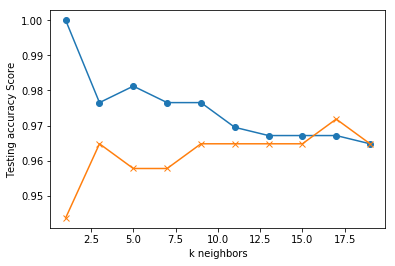

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy
train_scores =[]
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker="o")
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [18]:
# k = 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
print("k=13 Test Acc: %.3f" % knn.score(X_test, y_test))

k=13 Test Acc: 0.965


# Decision Tree & Random Forest

In [19]:
from sklearn import tree

# Create a decision tree model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9225352112676056

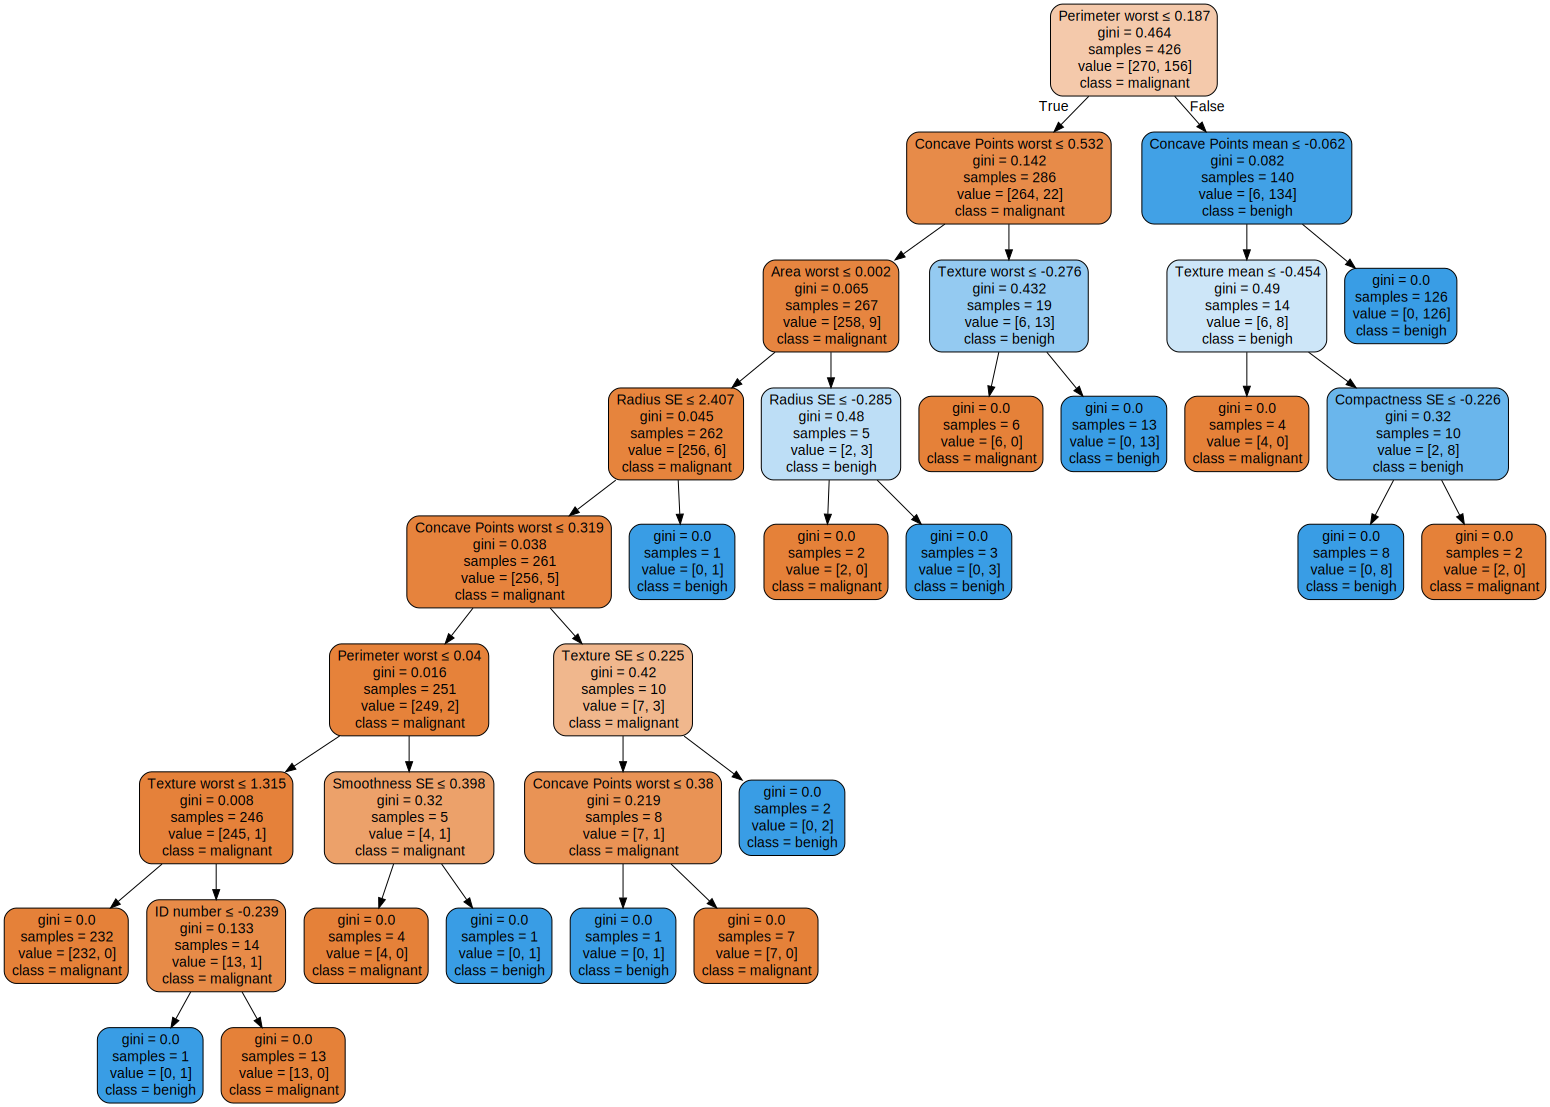

In [20]:
# Use graphviz to visualize the tree
import graphviz
dot_data = tree.export_graphviz(
    clf, out_file=None,
    feature_names = feature_names,
    class_names = target_names,
    filled=True, rounded=True,
    special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [21]:
# Create a Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9507042253521126

In [22]:
# Sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.1451689839014713, 'Perimeter worst'),
 (0.12180612570625787, 'Area worst'),
 (0.1146349674942611, 'Radius worst'),
 (0.11339830802488615, 'Concave Points worst'),
 (0.06866931733928286, 'Radius mean'),
 (0.06512283918511591, 'Concave Points mean'),
 (0.06139962939821987, 'Perimeter mean'),
 (0.04519234820852792, 'Area mean'),
 (0.0343244400855345, 'Concavity mean'),
 (0.030427873527169136, 'Area SE'),
 (0.02600702614366317, 'Concavity worst'),
 (0.020975416615957546, 'Compactness worst'),
 (0.01701926563089477, 'Texture worst'),
 (0.01577125436274843, 'Texture mean'),
 (0.01300010652942009, 'Perimeter SE'),
 (0.01245526381922944, 'Radius SE'),
 (0.01173296272058611, 'Concavity SE'),
 (0.011344735239668995, 'Symmetry worst'),
 (0.01126849801098714, 'Smoothness worst'),
 (0.0103003953337873, 'Compactness mean'),
 (0.006330532161496708, 'Texture SE'),
 (0.006255820210566033, 'Fractal Dimension worst'),
 (0.005955097373622967, 'Smoothness mean'),
 (0.005337852843088614, 'ID number'),
 